In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")


In [2]:
df=pd.read_csv(r"C:\Users\sam\Desktop\oasis\datasets\Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
df[df.duplicated()]

,Unnamed: 0,TV,Radio,Newspaper,Sales


In [7]:
df.shape

(200, 5)

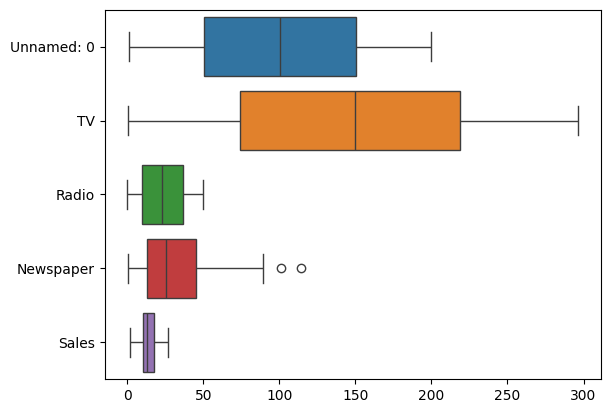

In [8]:
sns.boxplot(df,orient='h')
plt.show()

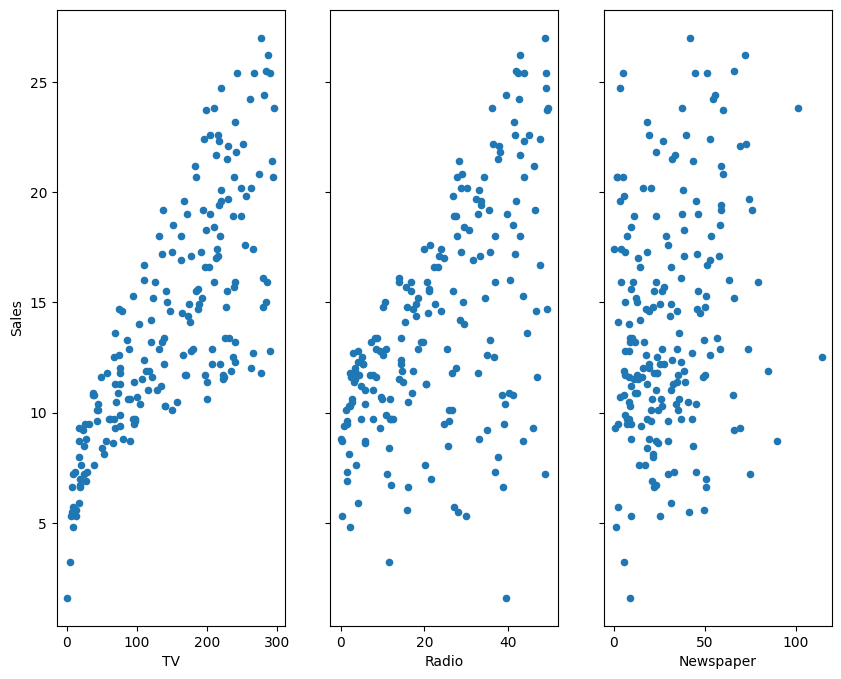

In [9]:
fig,axs= plt.subplots(1,3,sharey=True)
df.plot(kind="scatter",x='TV',y='Sales',ax=axs[0],figsize=(10,8))
df.plot(kind="scatter",x='Radio',y='Sales',ax=axs[1],figsize=(10,8))
df.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[2],figsize=(10,8))
plt.show()

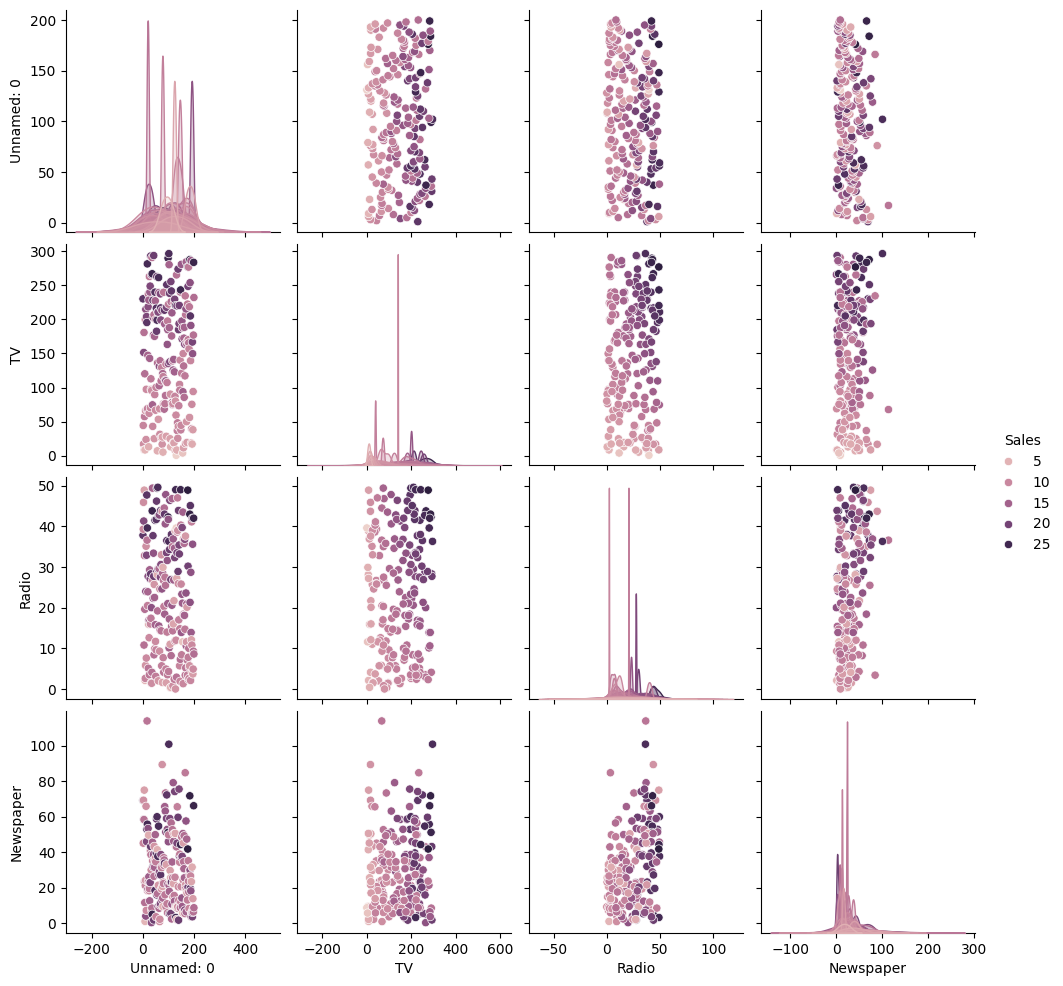

In [10]:

sns.pairplot(data=df,hue='Sales')
plt.show()

Evaluation

In [11]:
x=df.drop(['Unnamed: 0','Sales'],axis=1)
y=df.Sales

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [14]:
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7892486264782085

In [15]:
model1=DecisionTreeRegressor()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.9498764553617197

In [16]:
model2=RandomForestRegressor()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.9704870011045998

Using Cross_val_score

In [17]:
from sklearn.model_selection import cross_val_score
print('DecisionTreeRegressor:',cross_val_score(DecisionTreeRegressor(),x,y))
print('LinearRegressor:',cross_val_score(LinearRegression(),x,y))
print('RandomForestRegressor:',cross_val_score(RandomForestRegressor(),x,y))

DecisionTreeRegressor: [0.95697839 0.96109401 0.94386236 0.95846713 0.9682257 ]
LinearRegressor: [0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]
RandomForestRegressor: [0.98079917 0.98388985 0.96977964 0.96022342 0.98007001]
